#### Import Libraries

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

#### Read Dataset

In [3]:
df = pd.read_csv('dataset/Spenser_1.tsv', sep='\t')
df[:10]

,CustomerID,Calendarday,month,PerformanceEvaluationPlanned,PerformanceEvaluationExecuted,PerformanceEvaluationAdHoc,TERRID,SAPECCSalesGroup,SAPECoeficient,APECoeficient,FPECoeficient,SAMEDAYVISIT,OVERDUE,UNDERDUE,OK,NOTOK,STATUS,V22,OVERDUEDAYS,TRESHOLD
0,100000136,5/1/2017,5,0,,,Employee 44,Team 1,,,,,,,,,,,,
1,100000136,5/4/2017,5,1,1,,Employee 44,Team 1,"90,9875",,"90,9875",,,,,,,not ok,,",15"
2,100000136,5/8/2017,5,1,1,,Employee 44,Team 1,"90,9875",,"90,9875",,,,,,,not ok,,",15"
3,100000136,5/11/2017,5,1,1,,Employee 44,Team 1,"90,9875",,"90,9875",,,,ok,,ok,ok,,",15"
4,100000136,5/12/2017,,,,,,,,"79,4975","90,9875",,,,,,,not ok,,",15"
5,100000136,5/15/2017,5,1,1,,Employee 44,Team 1,"90,9875",,"90,9875",,,,,,,not ok,,",15"
6,100000136,5/18/2017,5,1,1,,Employee 44,Team 1,"90,9875",,"90,9875",,,,,,,not ok,,",15"
7,100000136,5/22/2017,5,1,1,,Employee 44,Team 1,"90,9875",,"90,9875",,,,,,,not ok,,",15"
8,100000136,5/25/2017,5,1,1,,Employee 44,Team 1,"90,9875",,"90,9875",,,,,,,not ok,,",15"
9,100000136,5/29/2017,6,1,1,,Employee 44,Team 1,"90,9875",,"92,6328125",,,,,,,not ok,,",15"


In [4]:
df.columns

Index(['CustomerID', 'Calendarday', 'month', 'PerformanceEvaluationPlanned',
       'PerformanceEvaluationExecuted', 'PerformanceEvaluationAdHoc', 'TERRID',
       'SAPECCSalesGroup', 'SAPECoeficient', 'APECoeficient', 'FPECoeficient',
       'SAMEDAYVISIT', 'OVERDUE', 'UNDERDUE', 'OK', 'NOTOK', 'STATUS', 'V22',
       'OVERDUEDAYS', 'TRESHOLD'],
      dtype='object')

In [5]:
temp = df[df['APECoeficient'] != ' ']

In [6]:
t1 = temp[temp['SAMEDAYVISIT'] == ' ']

In [7]:
t1

,CustomerID,Calendarday,month,PerformanceEvaluationPlanned,PerformanceEvaluationExecuted,PerformanceEvaluationAdHoc,TERRID,SAPECCSalesGroup,SAPECoeficient,APECoeficient,FPECoeficient,SAMEDAYVISIT,OVERDUE,UNDERDUE,OK,NOTOK,STATUS,V22,OVERDUEDAYS,TRESHOLD
4,100000136,5/12/2017,,,,,,,,"79,4975","90,9875",,,,,,,not ok,,",15"
48,100000136,10/10/2017,,,,,,,,"90,55",96,,,,,,,not ok,,",15"
64,100000136,12/2/2017,,,,,,,,"70,4990909090909","85,275",,,,,,,not ok,,",15"
121,100000142,5/17/2017,,,,,,,,"80,935","76,0690476190476",,,,,,,not ok,,",15"
131,100000142,7/19/2017,,,,,,,,"72,3858771929824","79,1689025689223",,,,,,,not ok,,",15"
162,100000144,6/15/2017,,,,,,,,"45,0696153846154","30,6278846153846",,,,,,,not ok,,",15"
173,100000144,8/24/2017,,,,,,,,"50,6183333333333","30,4458333333333",,,,,,,not ok,,",15"
183,100000144,10/19/2017,,,,,,,,"51,0333333333333","33,4458333333333",,,,,,,not ok,,",15"
249,100000145,10/19/2017,,,,,,,,"44,679","52,1964285714286",,,,,,,not ok,,",15"
282,100000146,7/19/2017,,,,,,,,"52,2445","60,8708333333333",,,,,,,not ok,,",15"


In [8]:
dc = dict()

for item in t1.values:
    custid = item[0]
    month = item[1].split('/')[0]
    if (custid, month) not in dc:
        dc[(custid, month)] = 1
    else:
        dc[(custid, month)] += 1

In [9]:
dc

{(100010544, '9'): 1,
 (100000646, '12'): 1,
 (100017038, '8'): 1,
 (100016669, '5'): 1,
 (100000245, '7'): 1,
 (100001198, '6'): 1,
 (100017030, '12'): 1,
 (100000341, '11'): 1,
 (100023533, '5'): 1,
 (100023192, '11'): 1,
 (100021592, '11'): 1,
 (100001075, '7'): 1,
 (100023681, '12'): 1,
 (100000567, '9'): 1,
 (100000378, '5'): 1,
 (100023320, '11'): 1,
 (100017801, '11'): 1,
 (100021601, '8'): 1,
 (100004699, '9'): 1,
 (100000975, '5'): 1,
 (100001600, '5'): 1,
 (100023816, '6'): 1,
 (100022262, '11'): 1,
 (100001800, '8'): 1,
 (100009294, '7'): 1,
 (100012806, '8'): 1,
 (100004339, '5'): 1,
 (100000386, '12'): 1,
 (100007867, '12'): 1,
 (100022623, '9'): 1,
 (100007482, '7'): 1,
 (100005928, '6'): 1,
 (100003869, '6'): 1,
 (100023022, '9'): 1,
 (100002830, '11'): 1,
 (100012772, '7'): 1,
 (100002711, '5'): 1,
 (100008396, '8'): 1,
 (100007135, '6'): 1,
 (100022601, '9'): 1,
 (100003912, '12'): 1,
 (100009364, '8'): 1,
 (100005241, '7'): 1,
 (100000575, '9'): 1,
 (100001738, '11'):

In [10]:
for key in dc.keys():
    if dc[key] > 1:
        print(key)

In [11]:
t1.values[0]

array([100000136, '5/12/2017', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
       '79,4975', '90,9875', ' ', ' ', ' ', ' ', ' ', ' ', 'not ok', ' ',
       ',15'], dtype=object)

In [12]:
dc = dict()

for item in t1.values:
    custid = item[0]
    day = int(item[1].split('/')[1])
    if (day) not in dc:
        dc[day] = 1
    else:
        dc[day] += 1

In [13]:
dc

{1: 88,
 2: 69,
 3: 37,
 4: 41,
 5: 118,
 6: 197,
 7: 240,
 8: 115,
 9: 186,
 10: 303,
 11: 341,
 12: 386,
 13: 441,
 14: 332,
 15: 487,
 16: 454,
 17: 388,
 18: 386,
 19: 396,
 20: 416,
 21: 371,
 22: 258,
 23: 193,
 24: 150,
 25: 96,
 26: 64,
 27: 59,
 28: 67,
 29: 18,
 30: 5}

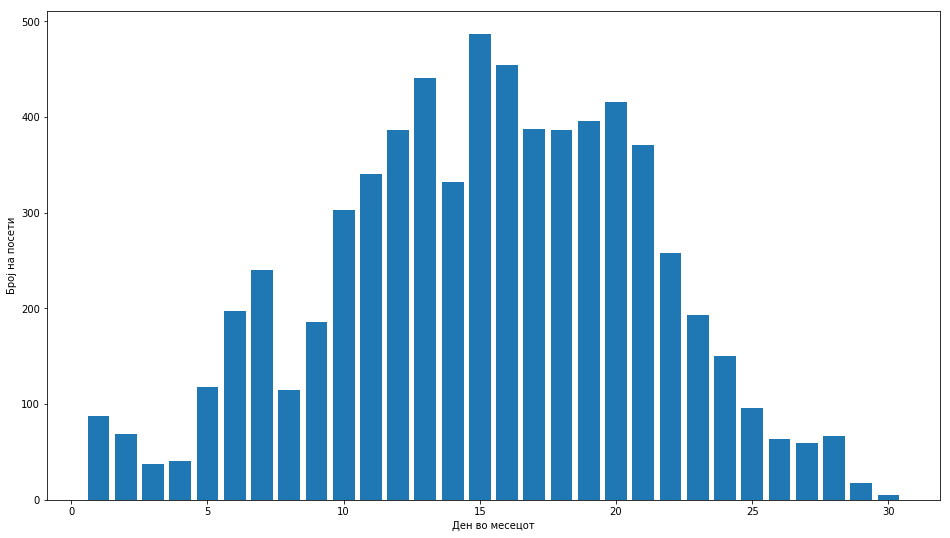

In [14]:
plt.figure(figsize=(16, 9))
plt.bar(dc.keys(), dc.values())
plt.xlabel('Ден во месецот')
plt.ylabel('Број на посети')
plt.show()

In [15]:
df.loc[0]

CustomerID                         100000136
Calendarday                         5/1/2017
month                                      5
PerformanceEvaluationPlanned               0
PerformanceEvaluationExecuted               
PerformanceEvaluationAdHoc                  
TERRID                           Employee 44
SAPECCSalesGroup                      Team 1
SAPECoeficient                              
APECoeficient                               
FPECoeficient                               
SAMEDAYVISIT                                
OVERDUE                                     
UNDERDUE                                    
OK                                          
NOTOK                                       
STATUS                                      
V22                                         
OVERDUEDAYS                                 
TRESHOLD                                    
Name: 0, dtype: object

In [16]:
for i in range(len(df)):
    if df['month'][i] == ' ':
        if df['month'][i-1] == df['month'][i+1] and df['CustomerID'][i-1] == df['CustomerID'][i+1]:
            df.set_value(i, 'month', df['month'][i-1])
#             df['month'][i] = df['month'][i-1]

C:\Python35\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [17]:
np.sum(df['month'] == ' ')

1109

In [19]:
temp = df[df['OK']=='ok']
len(temp[temp['STATUS']=='not ok'])

491

In [20]:
len(temp[temp['STATUS']=='ok'])

3877